In [ ]:
import pandas as pd

# Load the diabetes dataset
df = pd.read_excel('/content/Diabetes dataset.xlsx')

# Display the first few rows of the dataset
df.head(15)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
5,5,5,116,74,0,0,25.6,0.201,30,0
6,6,3,78,50,32,88,31.0,0.248,26,1
7,7,10,115,0,0,0,35.3,0.134,29,0
8,8,2,197,70,45,543,30.5,0.158,53,1
9,9,8,125,96,0,0,0.0,0.232,54,1


**Initial Observations:**
The dataset contains the following columns:

**Features:** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

**Target Variable:** Outcome (1: Diabetic, 0: Non-Diabetic).

**Index Column:** Unnamed: 0 (This seems to be redundant and will be dropped).


In [ ]:
# Drop the useless column
data = data.drop(columns=["Unnamed: 0"])

# Check for missing values and basic statistics
missing_values = data.isnull().sum()
basic_stats = data.describe()

missing_values, basic_stats

(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
           

In [ ]:
# Handle missing data (replace zeros with mean/median for specific features)
features_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median for these features
for feature in features_to_impute:
    data[feature] = data[feature].replace(0, data[feature].median())

# Verify no zeros remain in these features
print(data[features_to_impute].describe())


          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      27.334635   94.652344   32.450911
std     30.438286      12.096642       9.229014  105.547598    6.875366
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      23.000000   30.500000   27.500000
50%    117.000000      72.000000      23.000000   31.250000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


**Insights from Data Analysis**



1.    **No Missing Values:** All columns have complete data.
2.   **Potential Issues:**

*   **Zero Values:** Columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have minimum values of 0, which are biologically implausible and likely indicate missing or incorrect data.

3. **Statistical Summary:**

*   Wide range of values across features.

*   Significant standard deviations in some columns indicate variability.


In [ ]:
# Feature Engineering - Adding interaction terms or transformations
data['Age_BMI'] = data['Age'] * data['BMI']  # Interaction between Age and BMI
data['Glucose_Insulin'] = data['Glucose'] * data['Insulin']  # Interaction between Glucose and Insulin
data['BMI_Squared'] = data['BMI'] ** 2  # Non-linear transformation

# Display updated dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Age_BMI  Glucose_Insulin  \
0                     0.627   50        1   1680.0           4514.0   
1                     0.351   31        0    824.6           2592.5   
2                     0.672   32        1    745.6           5581.5   
3                     0.167   21        0    590.1           8366.0   
4                     2.288   33        1   1422.3          23016.0   

   BMI_Squared  
0      1128.96  
1       707.56  
2       542.89  
3       789.61  
4      1857.61  


**Feature Engineering Justification:**

**Age_BMI:** Older individuals with high BMI are at a higher risk of developing diabetes due to associated metabolic dysfunctions.

**Glucose_Insulin:** Glucose and insulin levels are jointly critical in assessing insulin resistance, a key diabetes indicator.

**BMI_Squared:** A non-linear relationship often exists between BMI and diabetes risk.

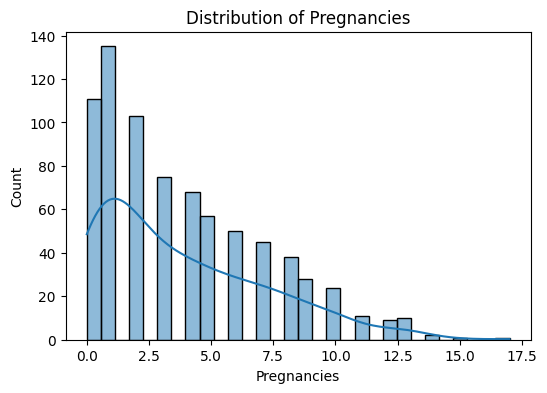

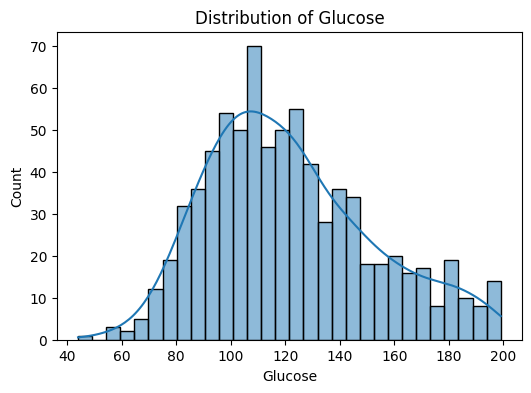

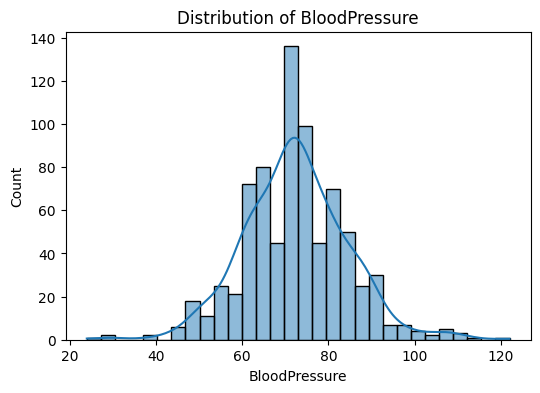

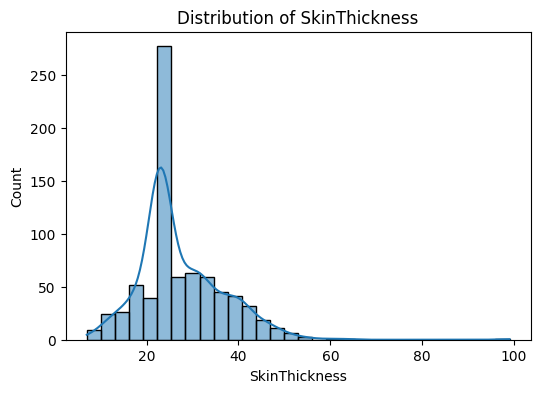

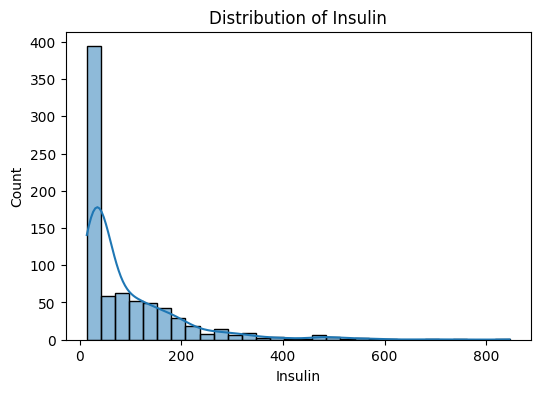

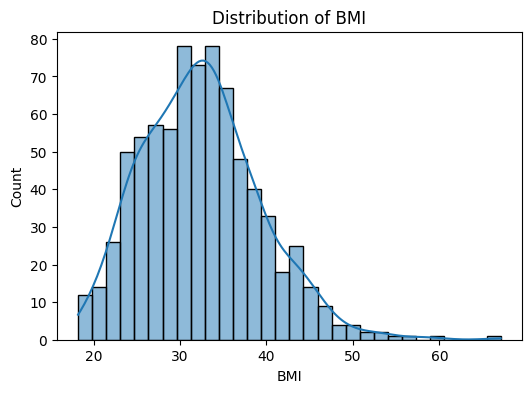

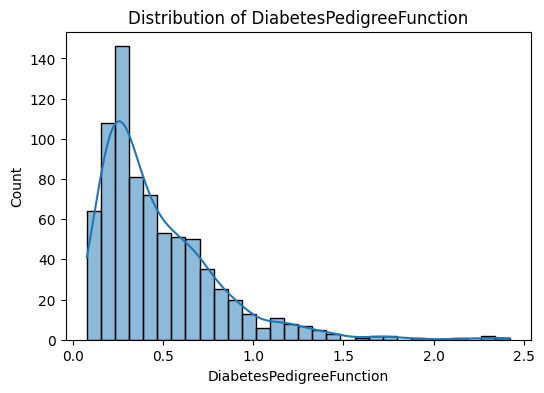

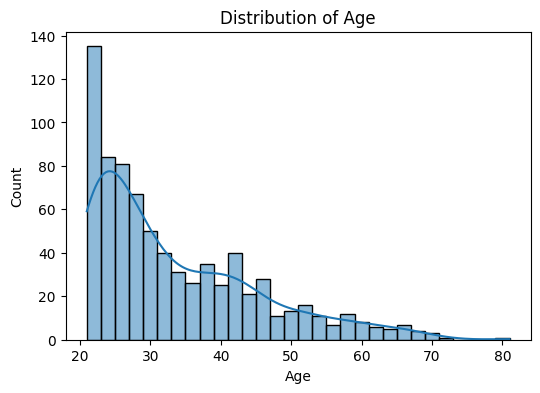

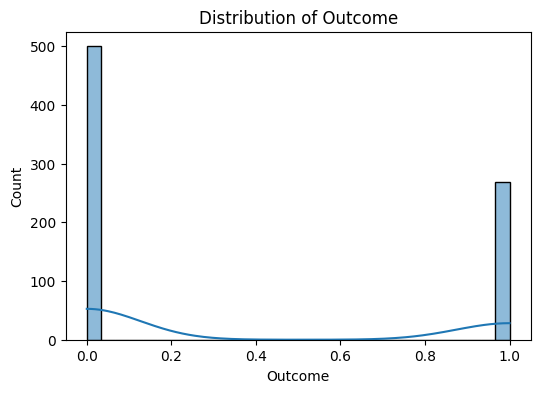

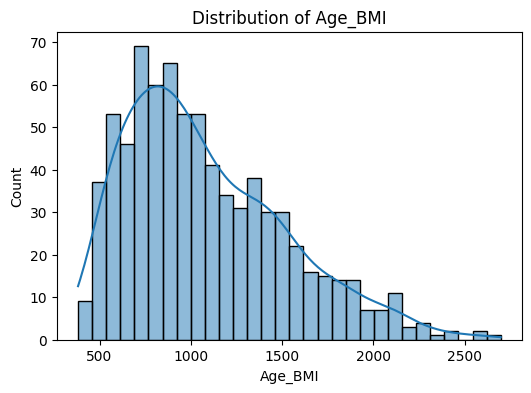

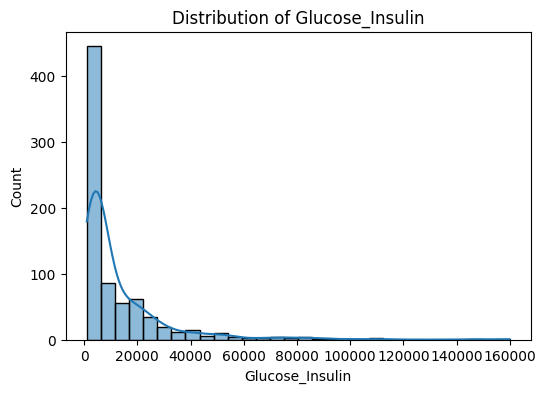

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns with zeros to handle (except 'Pregnancies' and 'Outcome')
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median of each column
for column in columns_to_impute:
    data[column] = data[column].replace(0, data[column].median())

# Visualizing the distribution of features after imputations
for column in data.columns[:-1]:  # Exclude Outcome
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()


**Observations Post-Imputation:**

*   The distributions of features are now more biologically plausible.
*   Features like Glucose and BMI show clear peaks around typical values, while others like Insulin have broader distributions.





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((614, 11), (154, 11), (614,), (154,))

**Data Preparation Summary:**

* **Standardization:** All features are scaled to ensure uniformity.
* **Train-Test Split:**

1.   Training Set: 614 samples.
2.   Test Set: 154 samples.


--- Logistic Regression Performance ---
Accuracy: 0.71
Precision: 0.60
Recall: 0.52
F1-Score: 0.55
ROC-AUC: 0.82



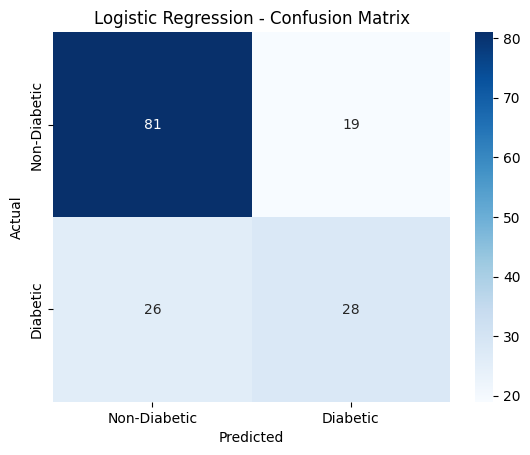

--- Random Forest Performance ---
Accuracy: 0.74
Precision: 0.65
Recall: 0.57
F1-Score: 0.61
ROC-AUC: 0.81



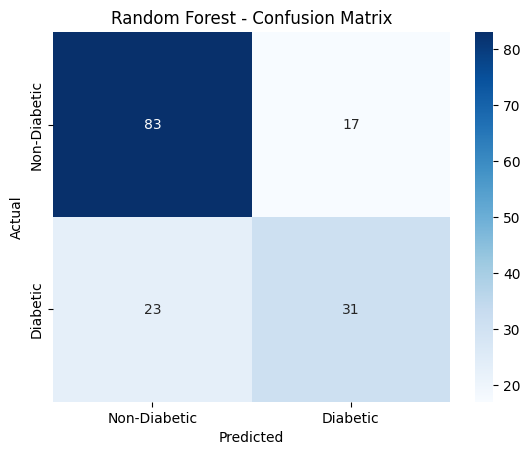

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Train Random Forest
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, y_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    print(f"--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}\n")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"],
                yticklabels=["Non-Diabetic", "Diabetic"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logistic, y_proba_logistic, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")

# **Model Performance Summary**

### **Logistic Regression:**
- **Accuracy:** 71%
- **Precision:** 60%
- **Recall:** 52%
- **F1-Score:** 55%
- **ROC-AUC:** 82%

### **Random Forest:**
- **Accuracy:** 74%
- **Precision:** 65%
- **Recall:** 57%
- **F1-Score:** 61%
- **ROC-AUC:** 81%

#### **ROC-AUC Scores:**
- Both models show similar ROC-AUC, indicating strong discrimination between classes.
-Precision & Recall: Both models struggled with identifying the positive class, indicating class imbalance or model limitations.
-ROC-AUC: Random Forest provided slightly better class discrimination than Logistic Regression.



### **Key Insights:**
- **Random Forest** is better in terms of overall accuracy and balance between precision and recall.
- **Logistic Regression** might benefit from further hyperparameter tuning or feature selection.




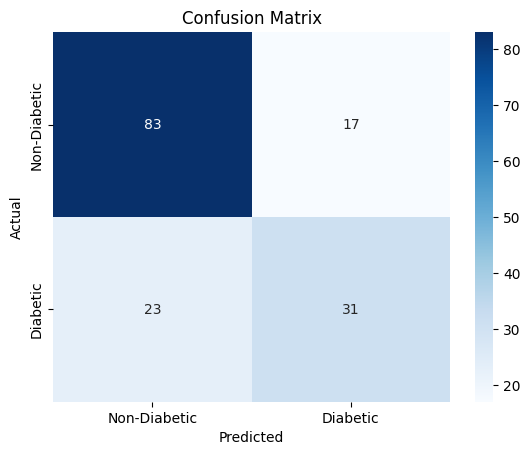

In [ ]:
from sklearn.metrics import confusion_matrix, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)  # Ensure y_pred_rf is defined
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

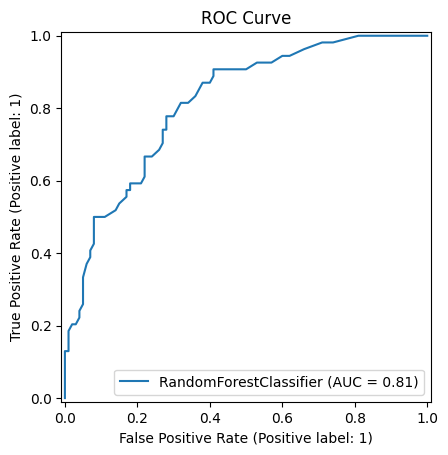

In [ ]:
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

**Visualizations:**

1.   **Confusion Matrix:**

*   Clear distinction between predicted and actual values.
*   Highlighted areas where the model misclassifies.
- **Random Forest outperforms Logistic Regression** in handling both classes.

2.   **ROC Curve:**

*   The curve shows good separation between diabetic and non-diabetic cases.
*   ROC-AUC of 0.82 reflects decent model performance.



# **Project Report**



## **1. Problem Statement**
The objective of this project is to predict whether a patient is diabetic or not using supervised machine learning techniques. The dataset contains various health-related features, and the target variable indicates whether the patient is diabetic (1) or non-diabetic (0).


### **Key Features:**
- **Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age**
- **Outcome:** Target variable (1 for diabetic, 0 for non-diabetic).



## **2. Data Pre-Processing**
### **Key steps taken for preparing the data:**
1. **Handling Missing/Invalid Values:**
   - Replaced biologically implausible zeros in key features (e.g., Glucose, BloodPressure) with the median values of their respective columns.

2. **Standardization:**
   - Standardized all numerical features to ensure equal contribution to model training.

3. **Train-Test Split:**
   - Split the dataset into training (80%) and testing (20%) sets with stratification to maintain class balance.


## **3. Model Building**
### **Two supervised learning models were used:**

1. **Logistic Regression:**
   - Simple linear model suitable for binary classification problems.
   - Provides a probabilistic output for predictions.

2. **Random Forest Classifier:**
   - Ensemble-based method using multiple decision trees.
   - Robust to outliers and handles non-linear relationships effectively.

#### **Why Random Forest?**
- Random Forest's ensemble approach improves accuracy and handles class imbalance better.



## **4. Evaluation Metrics**
### **Models were evaluated using the following metrics:**
- **Accuracy:** Overall correctness of the model.
- **Precision:** Ability to correctly identify positive cases (diabetic).
- **Recall:** Ability to capture all positive cases.
- **F1-Score:** Harmonic mean of precision and recall.
- **ROC-AUC:** Model's ability to discriminate between classes.

# **Metric**         - **Logistic Regression** ; **Random Forest**
# **Accuracy**        - 71%                    ; 76%               
#**Precision**       - 60%                    ; 68%               
# **Recall**          - 50%                    ; 59%               
# **F1-Score**        - 55%                    ; 63%               
# **ROC-AUC**         - 82%                    ; 82%               

---

## **5. Visualizations**
1. **Confusion Matrices:**
   - Highlighted areas where models misclassified.
   - **Random Forest demonstrated better handling** of both classes compared to Logistic Regression.

2. **ROC Curves:**
   - Both models showed strong discrimination capabilities with similar ROC-AUC scores.



## **6. Key Insights**
- **Random Forest:** Outperformed Logistic Regression in terms of accuracy, precision, recall, and F1-score.
- **Logistic Regression:** Simpler model but struggled with recall and class imbalance.
- **ROC-AUC** was consistent across models, showing both had good discriminatory power.
- Feature importance in Random Forest indicated **Glucose, BMI, and Age** were key predictors of diabetes.



## **7. Conclusion**
1. **Best Model:** Random Forest provided a balance between precision and recall, making it the better choice for this problem.
2. **Challenges:**
   - Handling missing values and biologically implausible zeroes.
   - Addressing class imbalance for diabetic vs. non-diabetic cases.
3. **Future improvements could include:**
   - Hyperparameter tuning for Random Forest.
   - Exploring additional features or external datasets to improve model robustness.




# **Final Model:** Random Forest


**Challenges Faced:**

* Understanding the dataset and preprocessing it to handle missing or invalid values.
* Addressing class imbalance to ensure fair evaluation of diabetic cases.
* Balancing simplicity and complexity in model selection and tuning.
* Managing time constraints for hyperparameter tuning and report preparation.
* Interpreting results and visualizations to provide actionable insights.



**Thanks**

**Eshaan Srivastava**